In [1]:
import qutip as qt
import numpy as np
import matplotlib.pylab as plt

In [24]:
from qutip import *

In [283]:
N=2
 # Define time vector
wq=6
alpha=0.2
adag_q1=create(N)
a_q1=destroy(N)
H0=wq*adag_q1*a_q1+alpha/2*adag_q1*adag_q1*a_q1*a_q1

In [284]:
H0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 6.]]

In [285]:
def projector(N,n,m):
    # |m><n| operator
    a = np.zeros((N,N),dtype = np.float64)
    if(n >= N or n < 0 or m >= N or m < 0):
        return Qobj(a)
    a[n,m] = 1
    return Qobj(a)

In [286]:
psi0 = ket2dm(basis(N,0)) # Define initial state

In [330]:
def H1_coeff(t, Hargs):
    w = Hargs['w']
    A = Hargs['A']
    B = Hargs['B']
    T = Hargs['T']
    D = Hargs['D']
    q = Hargs['q']
    return A * np.exp(-B * (t / T - 0.5) ** 2) +1j* A * np.exp(-B * (t / T - 0.5) ** 2)*(B*(T-2*t))/T/T/D*q

H1 = (a_q1+adag_q1) 
H1=[H1, 'A * sin(w * t) * exp(-B*(t/T-0.5)**2)-0*A*cos(w*t)*( B*(T-2*t)* exp(-B*(t/T-0.5)**2)/T/T)/D*q']

In [346]:
# H = [H0,[H1,H1_coeff]]
# for wq in np.linspace(5,6,100):
H = [H0,H1]
q=1
tlist = np.linspace(0, 60, 100)
Hargs = {'w': wq,'A': 0.14,'B':10,"T": 40, "D": alpha,"q":q}
opts = Options(rhs_reuse=True)
# eops=[projector(N,0,0),projector(N,1,1),projector(N,2,2),projector(N,3,3)]
eops=[projector(N,0,0),projector(N,1,1)]
output = mesolve(H, psi0, tlist, c_ops=[],e_ops= eops, args=Hargs,options=opts)

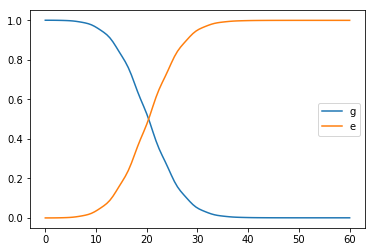

In [347]:
plt.plot(tlist,output.expect[0],label='g')
plt.plot(tlist,output.expect[1],label='e')
plt.plot(tlist,output.expect[2],label='f')
# plt.plot(tlist,output.expect[3],label='d')
plt.legend()

In [341]:
output.expect[1][-1]

0.9994618394934353

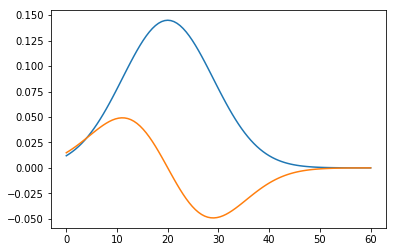

In [336]:
plt.plot(tlist,np.real(np.array([H1_coeff(t, Hargs) for t in tlist])))
plt.plot(tlist,np.imag(np.array([H1_coeff(t, Hargs) for t in tlist])))

In [307]:
from scipy.integrate import quad

In [345]:
quad(H1_coeff,0,50, args=Hargs)[0]/np.pi

0.0986049370977187